# Aprendizaje Automático - Proyecto Final
## Regresión Logística 2

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("heart.csv")
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
df = pd.concat([df, a, b, c], axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])

## Regresión Logística

Una vez analizados y tratados los datos, podemos empezar a aplicar algunas técnicas. En primer lugar utilizaremos la regresión logística. Calcularemos el coste y el gradiente en sucesivas iteraciones, empezando con una matriz de pesos (Thetas) cercana a cero (0.01) y un sesgo de 0.0:

In [9]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=0)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [10]:
def init(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

def sigmoid(z):    
    y_head = 1 / (1 + np.exp(-z))
    return y_head

def forwardBackward(weight, bias, x_train, y_train):
    # Cálculo del coste    
    y_head = sigmoid(np.dot(weight.T, x_train) + bias)
    loss = -(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Cálculo del gradiente
    derivative_weight = np.dot(x_train,((y_head - y_train).T)) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost, gradients

def update(weight, bias, x_train, y_train, learningRate, iteration):
    costList = []
    index = []
    
    for i in range(iteration):
        cost, gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index, costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iteration):
    weight, bias = init(x_train.shape[0])
    parameters, gradients = update(weight, bias, x_train, y_train, learningRate, iteration)
    y_prediction = predict(parameters["weight"], parameters["bias"], x_test)
    
    print("Porcentaje de acierto: {:.2f}%".format(
        (100 - np.mean(np.abs(y_prediction - y_test)) * 100)))

iteration: 100
cost: 0.4615352029307323


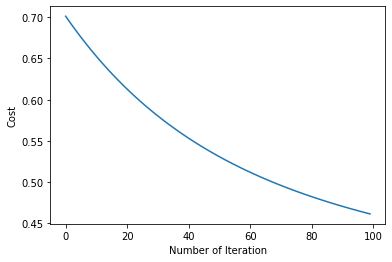

Porcentaje de acierto: 90.16%
iteration: 100
cost: 0.346198464353216


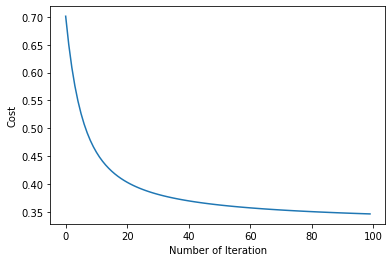

Porcentaje de acierto: 86.89%
iteration: 100
cost: 0.3339741350983705


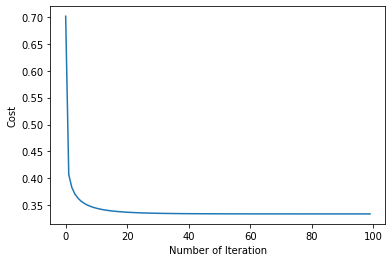

Porcentaje de acierto: 85.25%
iteration: 100
cost: 0.33397085002128696


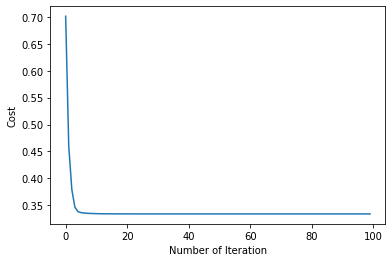

Porcentaje de acierto: 85.25%
iteration: 100
cost: 0.43264030198454306


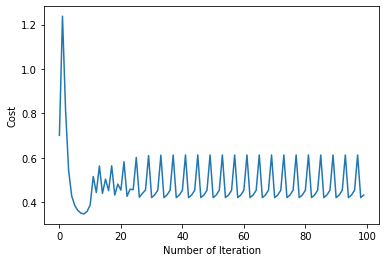

Porcentaje de acierto: 81.97%
iteration: 1000
cost: 0.3461801952630567


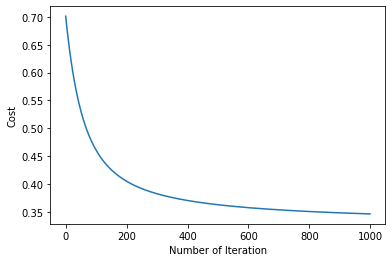

Porcentaje de acierto: 86.89%
iteration: 1000
cost: 0.33397460434743975


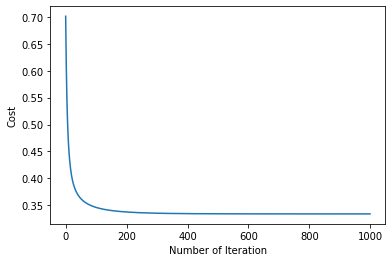

Porcentaje de acierto: 85.25%
iteration: 1000
cost: 0.3339708500211741


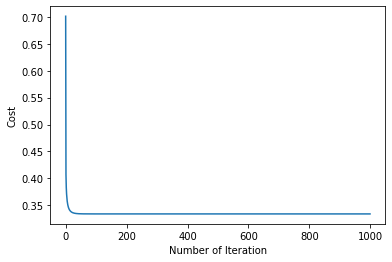

Porcentaje de acierto: 85.25%
iteration: 1000
cost: 0.3339708500211741


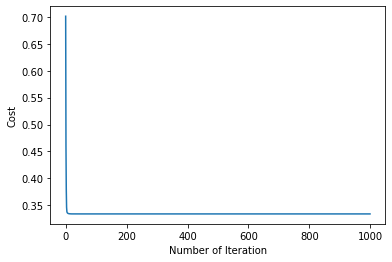

Porcentaje de acierto: 85.25%
iteration: 1000
cost: 0.43264030156838434


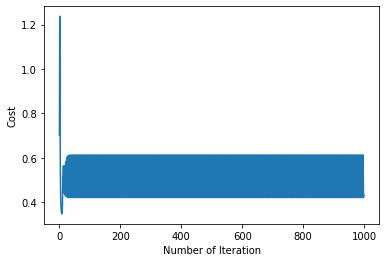

Porcentaje de acierto: 81.97%


In [11]:
logistic_regression(x_train, y_train, x_test, y_test, 0.01, 100)
logistic_regression(x_train, y_train, x_test, y_test, 0.1, 100)
logistic_regression(x_train, y_train, x_test, y_test, 1, 100)
logistic_regression(x_train, y_train, x_test, y_test, 3, 100)
logistic_regression(x_train, y_train, x_test, y_test, 10, 100)

logistic_regression(x_train, y_train, x_test, y_test, 0.01, 1000)
logistic_regression(x_train, y_train, x_test, y_test, 0.1, 1000)
logistic_regression(x_train, y_train, x_test, y_test, 1, 1000)
logistic_regression(x_train, y_train, x_test, y_test, 3, 1000)
logistic_regression(x_train, y_train, x_test, y_test, 10, 1000)